##### Support Vector Machine

##### Dataset

Download `letterdata.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

load the dataset

In [2]:
df = pd.read_csv('datasets/letterdata.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.shape

(20000, 17)

Separate the input and output variable

In [4]:
# input data
x = df.drop('letter', axis=1)

# output data
y = df['letter']

In [5]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


<Axes: xlabel='count', ylabel='letter'>

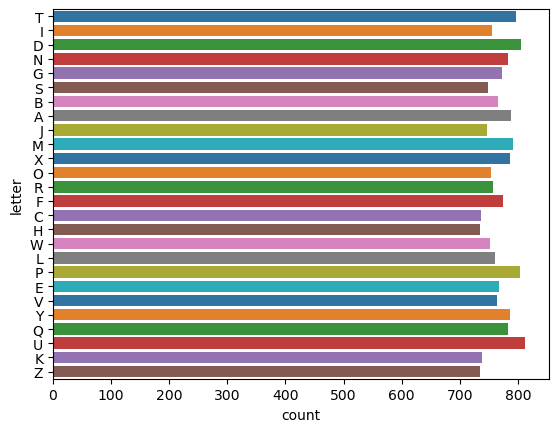

In [17]:
sns.countplot(y=y, palette='tab10', hue=y, legend=False)

In [14]:
y.value_counts().sort_index()

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: count, dtype: int64

##### Cross-Validation

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

##### Build the model

In [21]:
from sklearn.svm import SVC

In [22]:
svm = SVC(kernel='linear')

In [23]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
svm.support_vectors_.shape

(6604, 16)

In [28]:
y_pred = svm.predict(x_test)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

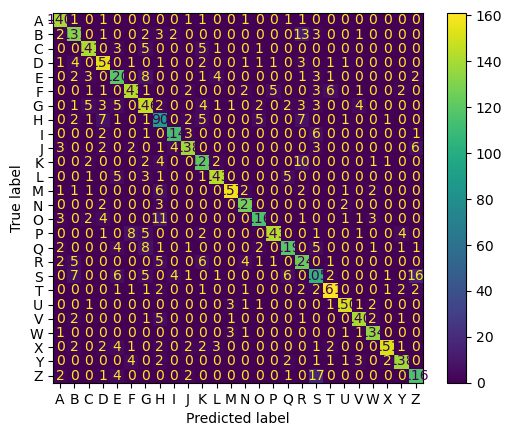

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [31]:
accuracy_score(y_test, y_pred)

0.8655

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.89      0.95      0.92       147
           B       0.83      0.83      0.83       158
           C       0.89      0.90      0.90       156
           D       0.85      0.90      0.88       171
           E       0.78      0.83      0.81       145
           F       0.89      0.86      0.87       167
           G       0.77      0.80      0.79       182
           H       0.65      0.73      0.69       123
           I       0.92      0.90      0.91       127
           J       0.91      0.87      0.89       159
           K       0.80      0.85      0.82       143
           L       0.92      0.90      0.91       159
           M       0.95      0.91      0.93       173
           N       0.91      0.95      0.93       134
           O       0.90      0.82      0.86       142
           P       0.95      0.87      0.91       165
           Q       0.88      0.82      0.85       145
           R       0.74    

In [37]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.97      0.97      0.97       147
           B       0.87      0.92      0.89       158
           C       0.97      0.94      0.95       156
           D       0.87      0.95      0.91       171
           E       0.90      0.90      0.90       145
           F       0.92      0.94      0.93       167
           G       0.88      0.93      0.91       182
           H       0.89      0.85      0.87       123
           I       0.97      0.92      0.95       127
           J       0.95      0.91      0.93       159
           K       0.95      0.90      0.92       143
           L       0.99      0.94      0.96       159
           M       0.95      0.94      0.94       173
           N       0.94      0.99      0.96       134
           O       0.92      0.92      0.92       142
           P       0.99      0.86      0.92       165
           Q       0.93      0.97      0.95       145
           R       0.81    

In [41]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [43]:
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.02      0.43      0.05       147
           B       0.00      0.00      0.00       158
           C       0.00      0.00      0.00       156
           D       0.00      0.00      0.00       171
           E       0.00      0.00      0.00       145
           F       0.00      0.00      0.00       167
           G       0.00      0.00      0.00       182
           H       0.00      0.00      0.00       123
           I       0.00      0.00      0.00       127
           J       0.00      0.00      0.00       159
           K       0.00      0.00      0.00       143
           L       0.00      0.00      0.00       159
           M       0.00      0.00      0.00       173
           N       0.00      0.00      0.00       134
           O       0.00      0.00      0.00       142
           P       0.00      0.00      0.00       165
           Q       0.00      0.00      0.00       145
           R       0.00    

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

##### Prediction on new data

In [46]:
new = x_test.iloc[[234, 653, 178]]
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
12869,5,9,5,6,6,7,6,10,1,7,8,8,8,4,0,8
16759,6,8,8,7,8,7,10,6,2,7,7,8,6,11,7,8
15005,6,15,4,8,3,11,5,4,5,12,2,7,3,8,5,10


In [48]:
y_test.iloc[[234, 653, 178]]

12869    M
16759    G
15005    I
Name: letter, dtype: object

In [49]:
svm.predict(new)

array(['M', 'G', 'I'], dtype=object)